In [1]:
import random
import sys
sys.path.append('..')
from mne.viz import plot_topomap
from spatialFilters import TDCA
import mne
import os
import numpy as np
import pickle


In [34]:
expName = 'sweep'
dir = '../datasets/%s.pickle' % expName
with open(dir, "rb") as fp:
    wholeset = pickle.load(fp)

sub = -1
chNames = wholeset[sub]['channel']
X = wholeset[sub]['wn']['X']
y = wholeset[sub]['wn']['y']

chnINX = [chNames.index(i) for i in chNames if i not in ['M1','M2','CB1','CB2']]
X = X[:, chnINX]
for i in ['M1','M2','CB1','CB2']:
    chNames.remove(i)
wholeset[sub]['name']

'zhangtiantian'

In [35]:
Add = 'Alpha-S1.mat'
from scipy.io import loadmat
X = loadmat(Add)['data'][0][0]['data']
_, _, classNUM, blockNUM = X.shape

X = X[chnINX, 125:]
X = X.transpose((-2, -1, 0, 1))
X = np.concatenate(X, axis=0)
y = np.repeat(np.arange(0, classNUM), blockNUM)


In [37]:
info = mne.create_info(ch_names=chNames, sfreq=250,ch_types='eeg')
fname = 'montage.loc'
montage = mne.channels.read_custom_montage(fname)
info.set_montage(montage)

<Info | 8 non-empty values
 bads: []
 ch_names: FP1, FPZ, FP2, AF3, AF4, F7, F5, F3, F1, FZ, F2, F4, F6, F8, ...
 chs: 60 EEG
 custom_ref_applied: False
 dig: 60 items (60 EEG)
 highpass: 0.0 Hz
 lowpass: 125.0 Hz
 meas_date: unspecified
 nchan: 60
 projs: []
 sfreq: 250.0 Hz
>

In [49]:
bigModel = TDCA(srate=250,montage=40,lag=0.14,winLEN=3)
bigModel.fit(X,y)
bigPattern = np.squeeze(bigModel.pattern)

# targetNUM = 40
# picked = random.sample(list(np.unique(y)), targetNUM)
# X_picked = np.concatenate([X[y == i] for i in picked])
# y_picked = np.concatenate([y[y == i] for i in picked])

# lilModel = TDCA(srate=250, montage=160, lag=0.14, winLEN=0.3)
# lilModel.fit(X_picked, y_picked)

# lilPattern = np.squeeze(lilModel.pattern)

In [47]:
# X_picked = X_picked-np.mean(X_picked,axis=0,keepdims=True)
# X_Cov = [np.cov(x) for x in X_picked]

# S_cov = [np.cov(np.dot(lilModel.filters[0].T,x)) for x in X_picked]
# filters = lilModel.filters[0]
# patterns = np.stack([x.T.dot(lilModel.pattern.T).dot(s) for (x,s) in zip(X_Cov,S_cov)])
# patterns = np.squeeze(patterns)

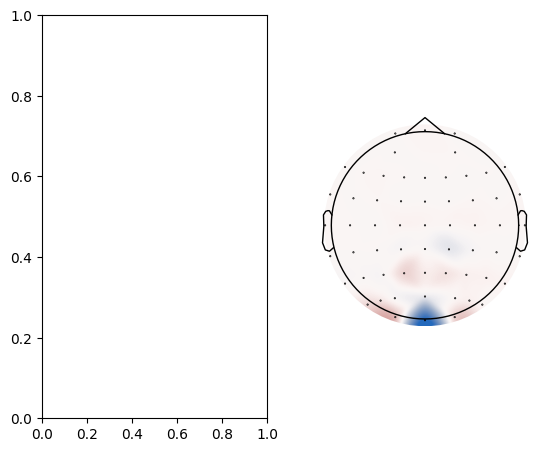

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

m = sns.diverging_palette(255, 15, as_cmap=True)
m = sns.color_palette("vlag", as_cmap=True)

f,axes = plt.subplots(1,2)
# ax1 = plot_topomap(data=patterns.mean(axis=0), pos=info, cmap=m, contours=0,
#                    image_interp='bicubic', axes=axes[0], show=False)
ax2 = plot_topomap(data=bigPattern, pos=info, cmap=m,contours=0, image_interp='bicubic', axes=axes[1], show=False)